In [ ]:
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_auc_score, roc_curve
import xgboost as xgb


In [ ]:
#---------------step-1 EDA-------------
# Load the Dataset
data = pd.read_csv('/content/risk credit card(Data).csv')
# Clean any extra spaces in column names
data.columns = data.columns.str.strip()

print("Sample of the loaded dataset:")
display(data.head())

print("\nColumns in the dataset:")
print(data.columns.tolist())

Sample of the loaded dataset:


,Lim_bal,Sex,Education,Marriage,Age,September,August,July,June,May,...,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6,Default_pay
0,20000.0,m,UnderGraduate,Married,24.0,2.0,2.0,-1.0,-1.0,-2.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,Yes
1,120000.0,m,UnderGraduate,Single,26.0,-1.0,2.0,0.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,Yes
2,90000.0,m,UnderGraduate,Single,34.0,0.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,No
3,50000.0,m,UnderGraduate,Married,37.0,0.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,No
4,50000.0,f,UnderGraduate,Married,57.0,-1.0,0.0,-1.0,0.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,No



Columns in the dataset:
['Lim_bal', 'Sex', 'Education', 'Marriage', 'Age', 'September', 'August', 'July', 'June', 'May', 'April', 'Bill_amt1', 'Bill_amt2', 'Bill_amt3', 'Bill_amt4', 'Bill_amt5', 'Bill_amt6', 'Pay_amt1', 'Pay_amt2', 'Pay_amt3', 'Pay_amt4', 'Pay_amt5', 'Pay_amt6', 'Default_pay']


In [ ]:
#  Prepare Features and Target
target_column = data.columns[-1]  # Assuming the target column is the last one
X = data.drop(target_column, axis=1)  # Drop the target column using the identified column name
y = data[target_column]

# Convert target variable to numerical representation (0 and 1)
y = y.map({'Yes': 1, 'No': 0}).fillna(0).astype(int)

In [ ]:
# Check for Missing Values
print("\nChecking missing values in each column:")
print(data.isnull().sum())


Checking missing values in each column:
Lim_bal        35
Sex            35
Education      35
Marriage       35
Age            35
September      35
August         35
July           35
June           35
May            35
April          35
Bill_amt1      35
Bill_amt2      35
Bill_amt3      35
Bill_amt4      35
Bill_amt5      35
Bill_amt6      35
Pay_amt1       35
Pay_amt2       35
Pay_amt3       35
Pay_amt4       35
Pay_amt5       35
Pay_amt6       35
Default_pay    35
dtype: int64


In [ ]:
data.describe()

,Lim_bal,Age,September,August,July,June,May,April,Bill_amt1,Bill_amt2,Bill_amt3,Bill_amt4,Bill_amt5,Bill_amt6,Pay_amt1,Pay_amt2,Pay_amt3,Pay_amt4,Pay_amt5,Pay_amt6
count,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000,2.996500e+04,29965.000000,29965.000000,29965.000000,29965.000000
mean,167442.005006,35.487969,-0.016753,-0.131854,-0.164392,-0.218922,-0.264509,-0.289438,51283.009778,49236.366294,4.706792e+04,43313.329885,40358.334390,38917.012281,5670.099316,5.927983e+03,5231.688837,4831.617454,4804.897047,5221.498014
std,129760.135222,9.219459,1.123492,1.196322,1.195878,1.168175,1.132220,1.149090,73658.132403,71195.567392,6.937135e+04,64353.514373,60817.130623,59574.147742,16571.849467,2.305346e+04,17616.361124,15674.464538,15286.372298,17786.976864
min,10000.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-2.000000,-165580.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,3595.000000,3010.000000,2.711000e+03,2360.000000,1787.000000,1262.000000,1000.000000,8.500000e+02,390.000000,300.000000,261.000000,131.000000
50%,140000.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,22438.000000,21295.000000,2.013500e+04,19081.000000,18130.000000,17124.000000,2102.000000,2.010000e+03,1804.000000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,67260.000000,64109.000000,6.020100e+04,54601.000000,50247.000000,49252.000000,5008.000000,5.000000e+03,4512.000000,4016.000000,4042.000000,4000.000000
max,1000000.000000,79.000000,8.000000,8.000000,8.000000,8.000000,8.000000,8.000000,964511.000000,983931.000000,1.664089e+06,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.000000,621000.000000,426529.000000,528666.000000


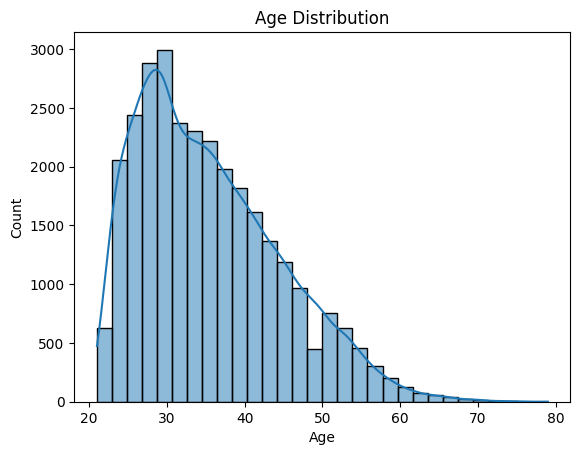

In [ ]:
# Importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'Age' using a histogram
sns.histplot(data['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()

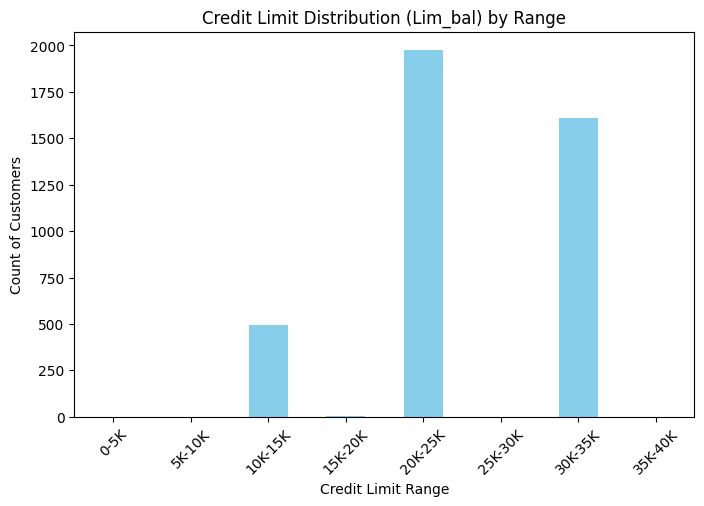

In [ ]:
import matplotlib.pyplot as plt

# Create bins for Lim_bal
bins = [0, 5000, 10000, 15000, 20000, 25000, 30000, 35000, 40000]
labels = ['0-5K', '5K-10K', '10K-15K', '15K-20K', '20K-25K', '25K-30K', '30K-35K', '35K-40K']

data['Lim_bal_binned'] = pd.cut(data['Lim_bal'], bins=bins, labels=labels, right=False)

plt.figure(figsize=(8, 5))
data['Lim_bal_binned'].value_counts().sort_index().plot(kind='bar', color='skyblue')
plt.title("Credit Limit Distribution (Lim_bal) by Range")
plt.xlabel("Credit Limit Range")
plt.ylabel("Count of Customers")
plt.xticks(rotation=45)
plt.show()

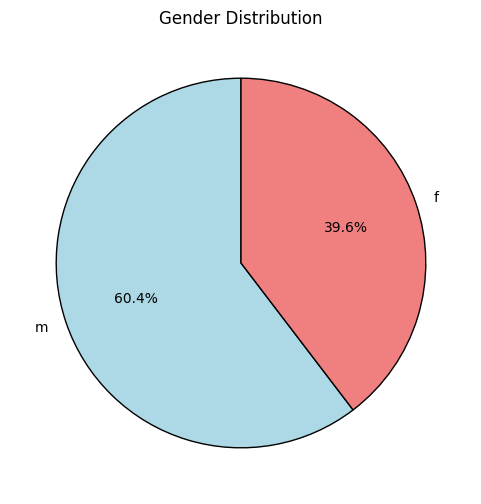

In [ ]:
import matplotlib.pyplot as plt

# Count the occurrences of each gender category
gender_counts = data['Sex'].value_counts()

# Plot a pie chart
plt.figure(figsize=(6, 6))
gender_counts.plot.pie(autopct='%1.1f%%', colors=['lightblue', 'lightcoral'], startangle=90, wedgeprops={'edgecolor': 'black'})
plt.title("Gender Distribution")
plt.ylabel('')  # Hides the y-label
plt.show()


Target variable class distribution:
Default_pay
No     0.778742
Yes    0.221258
Name: proportion, dtype: float64


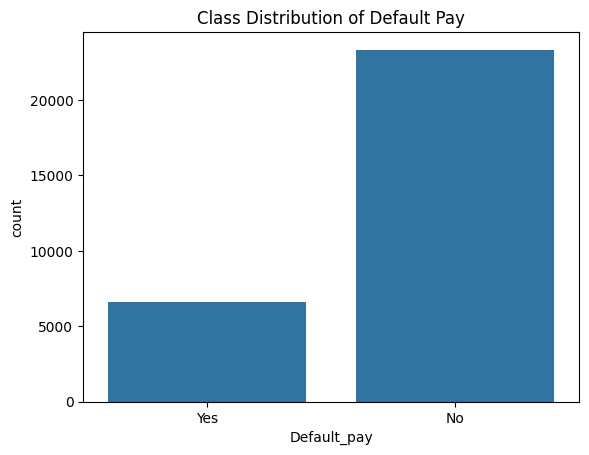

In [ ]:
#Checking the balance of the target variable (Default_pay)
print("\nTarget variable class distribution:")
print(data['Default_pay'].value_counts(normalize=True))

# Visualizing the class distribution with a countplot
sns.countplot(x='Default_pay', data=data)
plt.title('Class Distribution of Default Pay')
plt.show()

In [ ]:
# ------------------- Step 2: Feature Engineering  -------------------
# Convert categorical columns to numerical using one-hot encoding
categorical_cols = X.select_dtypes(include=['object']).columns
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

print("\nFeature engineering done! Data scaled successfully.")
print(f"Shape of the features: {X_scaled.shape}")



Feature engineering done! Data scaled successfully.
Shape of the features: (30000, 30)


In [ ]:
 # Split the Data
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [ ]:
# ------------------- Step 3: Model Selection & Training (XGBoost) -------------------
model = xgb.XGBClassifier( eval_metric="logloss")

params = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [100, 200]
}

grid_search = GridSearchCV(model, param_grid=params, cv=3, scoring='accuracy', verbose=1)
grid_search.fit(X_train, y_train)

best_model = grid_search.best_estimator_

print("\n✅ Model Training Completed!")
print(f"Best Parameters found: {grid_search.best_params_}")

Fitting 3 folds for each of 18 candidates, totalling 54 fits

✅ Model Training Completed!
Best Parameters found: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}


In [ ]:
# ------------------- Step 4: Model Evaluation -------------------
y_pred = best_model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred) * 100
precision = precision_score(y_test, y_pred) * 100
recall = recall_score(y_test, y_pred) * 100
f1 = f1_score(y_test, y_pred) * 100

print("\n📊 Evaluation Metrics:")
print(f"Accuracy: {accuracy:.2f}%")
print(f"Precision: {precision:.2f}%")
print(f"Recall: {recall:.2f}%")
print(f"F1 Score: {f1:.2f}%")


📊 Evaluation Metrics:
Accuracy: 81.15%
Precision: 66.43%
Recall: 34.77%
F1 Score: 45.65%


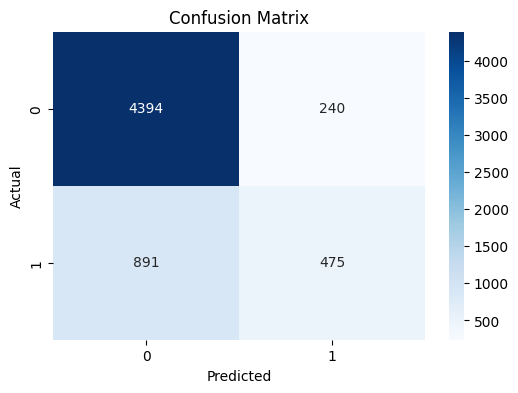

In [ ]:
#  Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


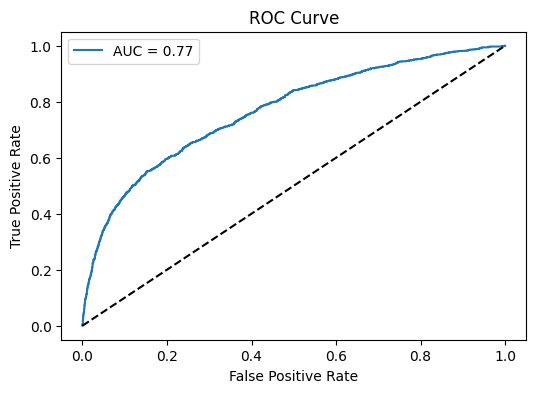

In [ ]:
#  ROC Curve and AUC Score
y_pred_proba = best_model.predict_proba(X_test)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

plt.figure(figsize=(6,4))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc_score(y_test, y_pred_proba):.2f}')
plt.plot([0,1], [0,1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


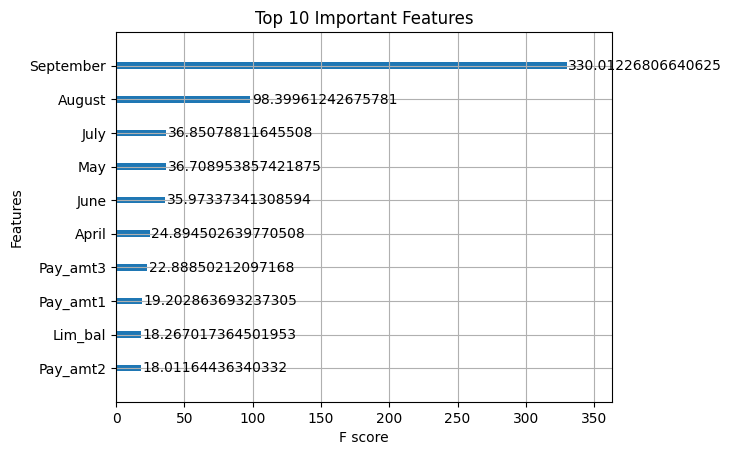

In [ ]:
#  Feature Importance
xgb.plot_importance(best_model,
                    max_num_features=10,   # Show top 10 features
                    importance_type='gain')  # Use "gain" to measure importance

# Add title and show plot
plt.title('Top 10 Important Features')
plt.show()

In [ ]:
# ------------------- Step 5: Final Predictions -------------------
print("\n🔮 Predicted Values :")
print(y_pred[:50])


🔮 Predicted Values :
[0 0 1 0 0 0 1 0 0 0 0 0 0 1 0 0 0 1 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 1 0 0 0 0]
